In [1]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import random
from itertools import combinations

from scipy import stats

### Интерактив 1

1. Подумайте над примерами явлений в вашей области деятельности, которые могут приводить к зависимости отдельных элементов выборки от других. (Список из не менее 3 примеров, а лучше больше)

2. Примените t-test к выборкам ниже. Они взяты из примера про выход вещества. Напишите код t-test вручную, а не из пакета. Воспользуйтесь таблицей значений распределения стьюдента. Дисперсии считаем равными.

3. Как вы думаете, почему результат применения критерия Стьюдента отличается от результата применения наивного критерия?

In [2]:
sample1 = np.array([89.7,81.4,84.5,84.8,87.3,79.7,85.1,81.7,83.7,84.5])
sample2 = np.array([84.7,86.1,83.2,91.9,86.3,79.3,82.6,89.1,83.7,88.5])

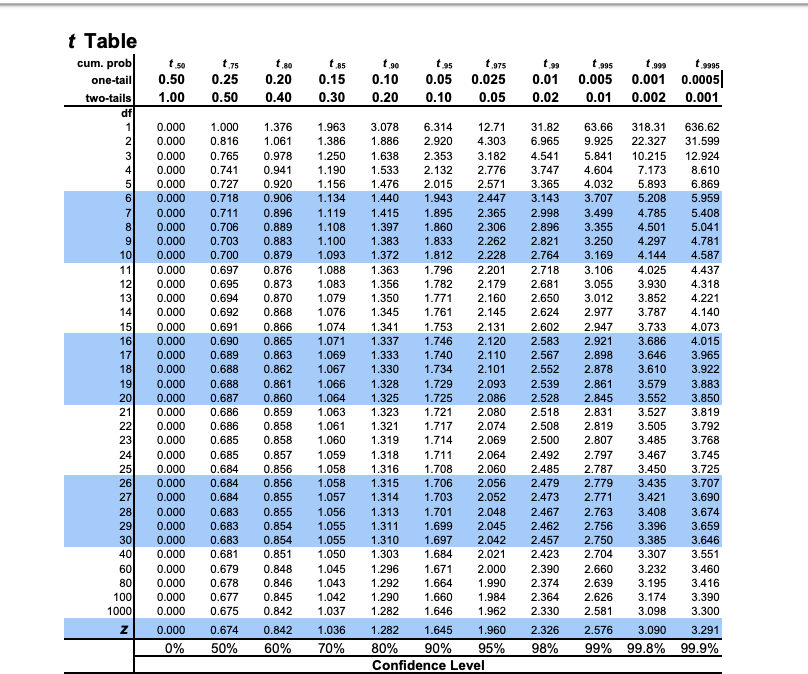

In [11]:
mean_delta = sample1.mean() - sample2.mean()
denom = np.sqrt(sample1.var(ddof=1) / sample1.size + sample2.var(ddof=1) / sample2.size)

t_stat = mean_delta / denom
t_stat

-0.8815771351054408

In [4]:
import scipy.stats as sps

In [10]:
sps.ttest_ind(sample1, sample2, equal_var=True)

Ttest_indResult(statistic=-0.8815771351054408, pvalue=0.38962608764018414)

In [9]:
sps.ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=-0.8815771351054408, pvalue=0.39020900834931826)

### Задание 2

В файле ниже представлены данные по распределению баеров по объявлениям. 
Был изменён механизм ранжирования в поиске. 
Посторойте при помощи бустрэпа доверительные интервалы для изменения среднего, 10 и 95 персентиля.

Что скажете о характере изменения значений персентиля? От чего такое могло произойти?


In [12]:
bs_data = pd.read_csv('bootstrap.csv')

In [13]:
def stat_intervals(stat, alpha = 0.05):
    return np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])

def get_bootstrap_samples(data, n_samples, custom_func = np.mean):
    return [custom_func(data[np.random.randint(0, len(data), len(data))]) for item in range(n_samples)]

In [15]:
print(bs_data.shape)
bs_data.sample(5)

(2300, 2)


,test_group,buyers_per_items
611,control,9.052136
2178,test,14.000000
2051,test,10.572050
1288,test,8.688242
1278,test,10.720272


In [ ]:
percentile_10 = lambda stat:  